# Goulib
library of useful code for scientific + technical applications

- author: Philippe Guglielmetti goulib@goulu.net
- copyright: Copyright 2013 Philippe Guglielmetti
- license: LGPL (see LICENSE.TXT)

- installation : "pip install Goulib"
- distribution: https://pypi.python.org/pypi/Goulib
- documentation: https://goulib.readthedocs.org/
- source : https://github.com/goulu/Goulib

Some modules offer specific IPython Notebook support

In [24]:
from Goulib.notebook import *
h2('Notebook')
h3('some useful tools for IPYthon/Jupyter notebooks')
h('notably this "print" function which accepts',1,1+1,int(9**.5),'or even more parameters')

In [25]:
from Goulib import math2, itertools2 #Goulib modules that complement std modules

# Modules
the following modules are described in their own notebooks:

## [Math2](notebooks/math2.ipynb)
more math without numpy

## [Expr](notebooks/expr.ipynb)


## [Table](notebooks/table.ipynb)
"mini pandas.DataFrame" Table class with Excel + CSV I/O, easy access to columns, HTML output, and much more.

## [Geom and Drawing](notebooks/drawing.ipynb)
2D geometry and vector graphics with .DXF, .SVG , .PDF I/O and bitmap graphics output

## [Image](notebooks/image.ipynb)
image processing made simple

## [Colors](notebooks/colors.ipynb)
very simple (RGB) color management

## Stats

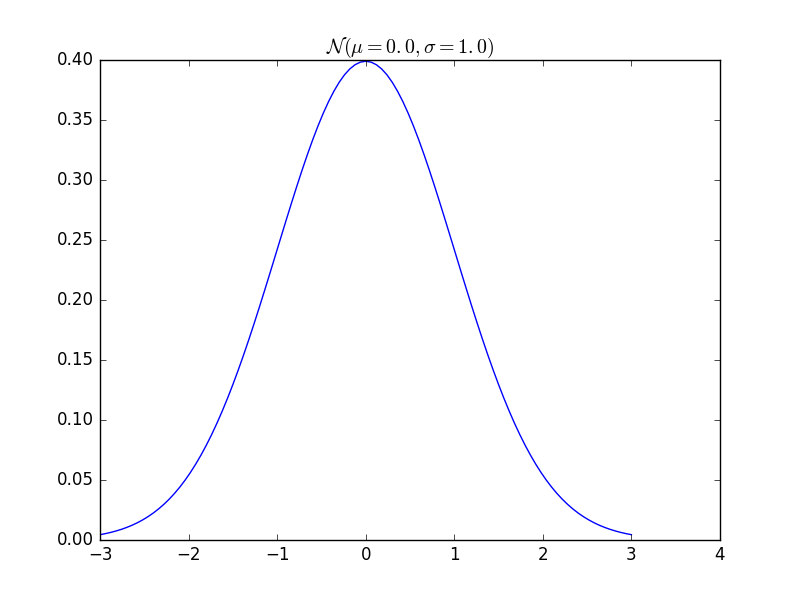

In [34]:
from Goulib.stats import *

n1=Normal()
n1

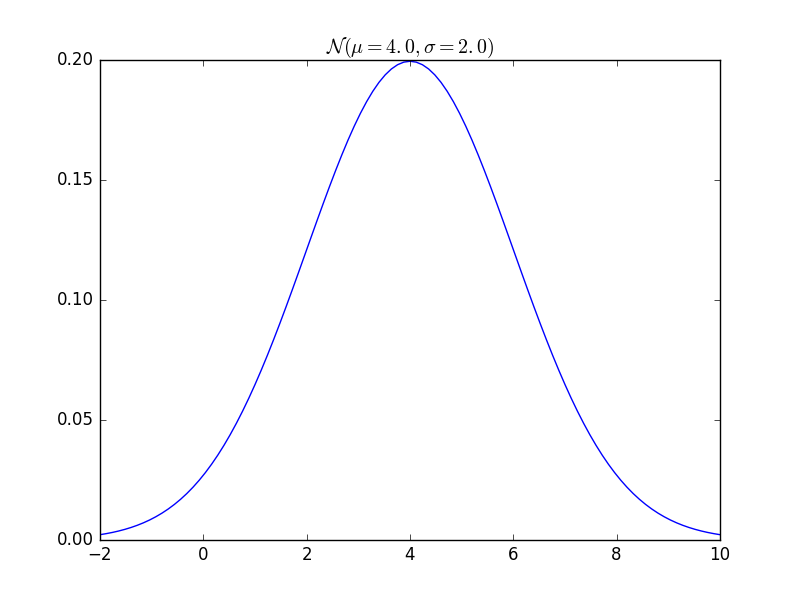

In [35]:
n2=Normal([],4,4)
n2

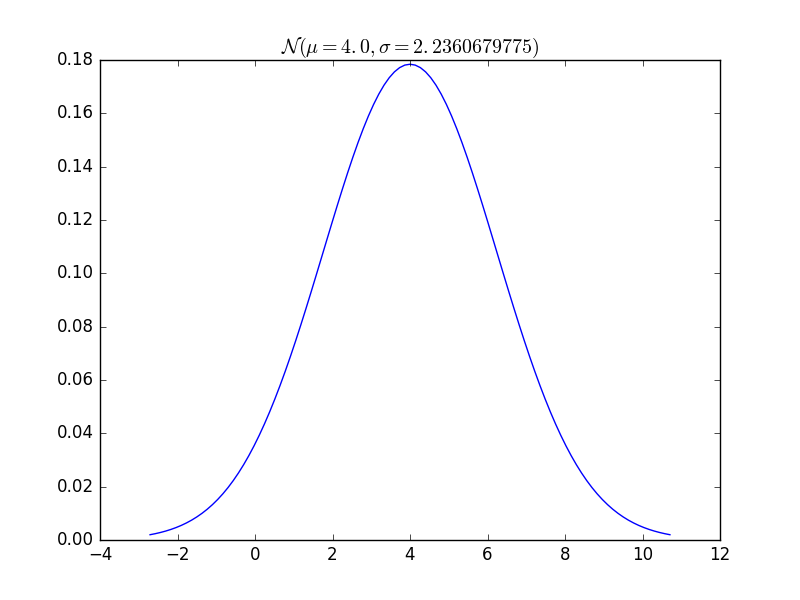

In [36]:
n1+n2

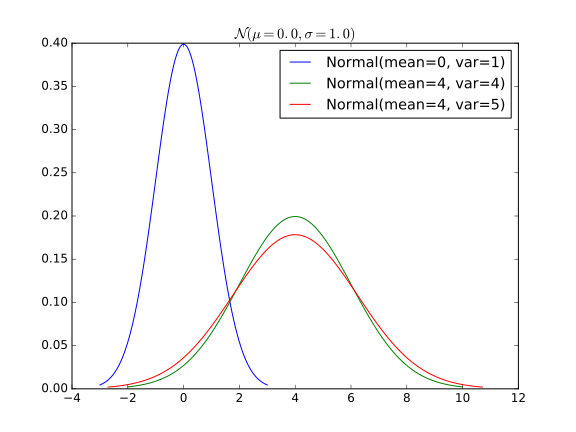

In [37]:
plot.plot([n1,n2,n1+n2])

## Graph
efficient Euclidian Graphs for [NetworkX](http://networkx.github.io/) and related algorithms

In [38]:
import networkx as nx
from Goulib.graph import *

In [39]:
g=nx.gn_graph(20)
nx.draw_networkx(g)

In [40]:
draw_networkx(g) #improved version over nx.draw_networkx

In [41]:
geo=nx.geographical_threshold_graph(50,25)
geo # NetworkX Graphs do not render in Notebooks...

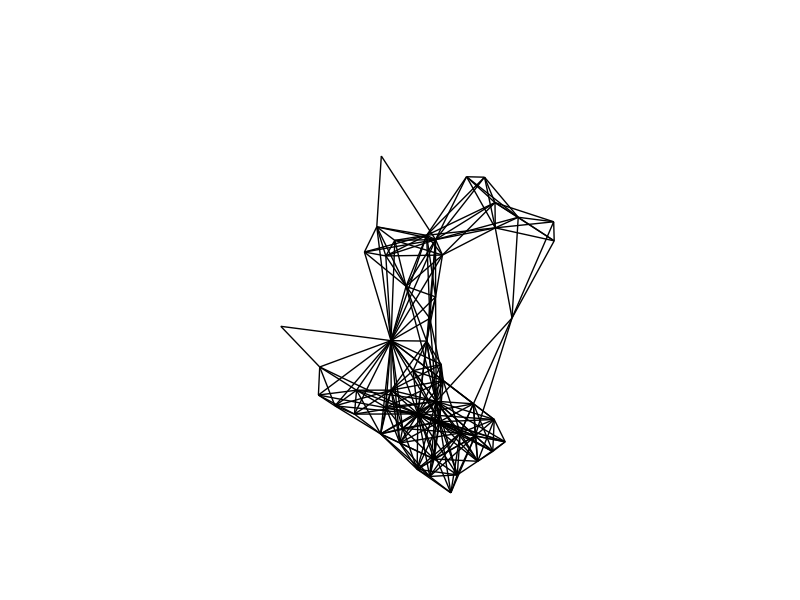

In [42]:
geo=GeoGraph(geo)
geo # GeoGraphs do !

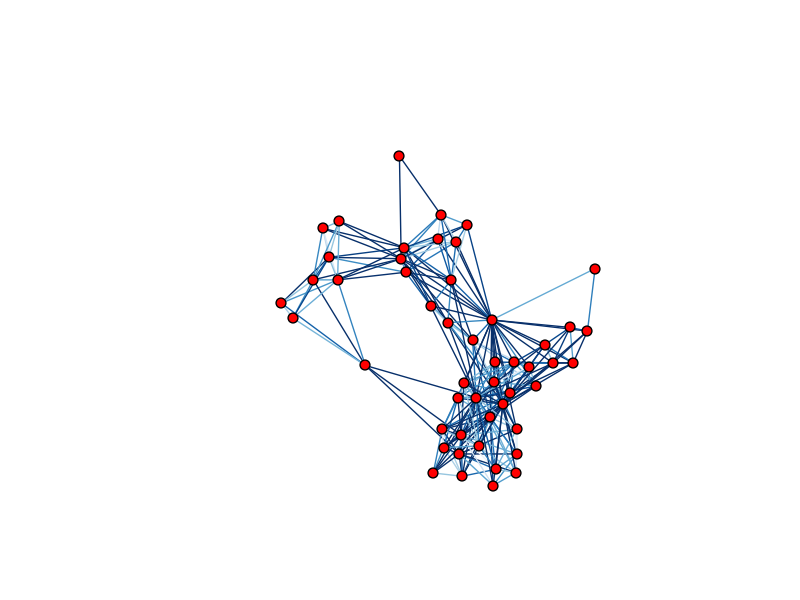

In [43]:
# it's easy to make GeoGraphs look nice
def edge_color(data): # simply define a function that maps edge data to a color
    return plt.get_cmap('Blues')(data['length']/.25)       
geo.render(edge_color=edge_color, node_size=50) #this will set geo.render_args ...
geo #... so here we display them :-)

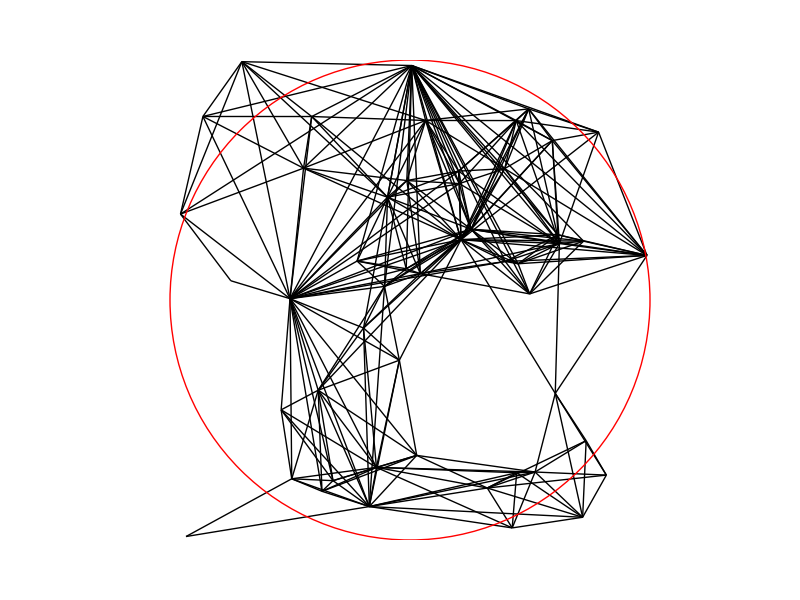

In [44]:
d=to_drawing(geo) # graphs can also be converted or added to a Goulib.Drawing
from Goulib.geom import Circle
c=Circle((0.5,0.5),0.5)
c.color='red'
d.append(c)

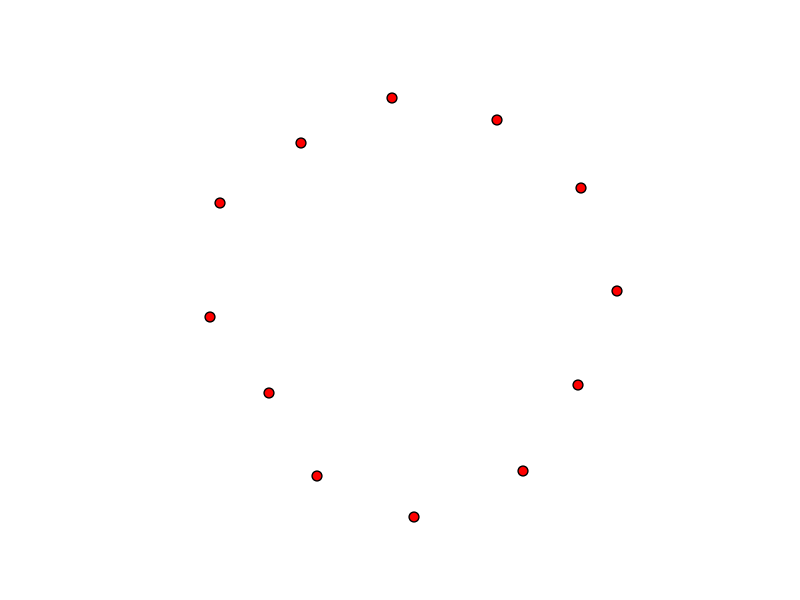

In [45]:
nodes=points_on_sphere(12)
sphere=GeoGraph(nodes=nodes) #GeoGraphs can also be built from n-dim points only
sphere.render(edge_color=edge_color, node_size=50) #this will set geo.render_args ...
sphere

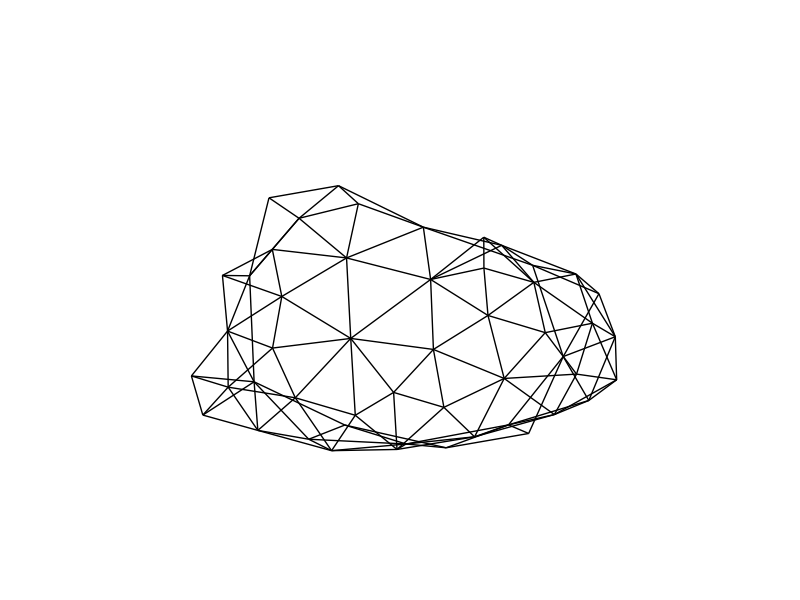

In [46]:
delauney_triangulation(geo) #creates a new GeoGraph from Delauney triangulation of a GeoGraph's nodes

## Polynomial

a Polynomial is an Expr defined by factors and with some more methods

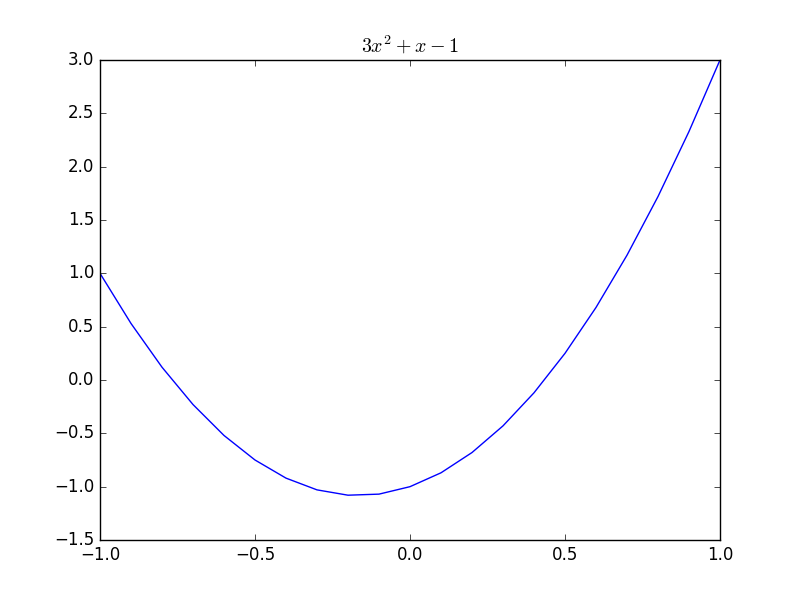

In [47]:
from Goulib.polynomial import *

p1=Polynomial([-1,1,3]) # inited from coefficients in ascending power order
p1 # Latex output

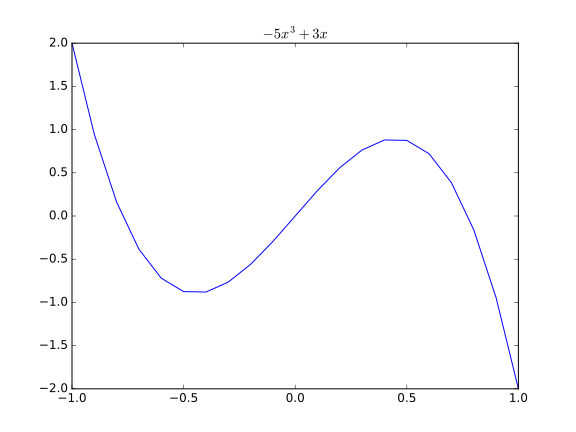

In [48]:
p2=Polynomial('- 5x^3 +3*x') # inited from string, in any power order, with optional spaces and *
p2.plot()

In [49]:
[(x,p1(x)) for x in itertools2.linspace(-1,1,11)] #evaluation

[(-1, 1.0),
 (-0.8, 0.12000000000000033),
 (-0.6000000000000001, -0.5199999999999998),
 (-0.4000000000000001, -0.9199999999999999),
 (-0.20000000000000007, -1.08),
 (-5.551115123125783e-17, -1.0),
 (0.19999999999999996, -0.6800000000000002),
 (0.39999999999999997, -0.12000000000000016),
 (0.6, 0.68),
 (0.8, 1.7200000000000004),
 (1.0, 3.0)]

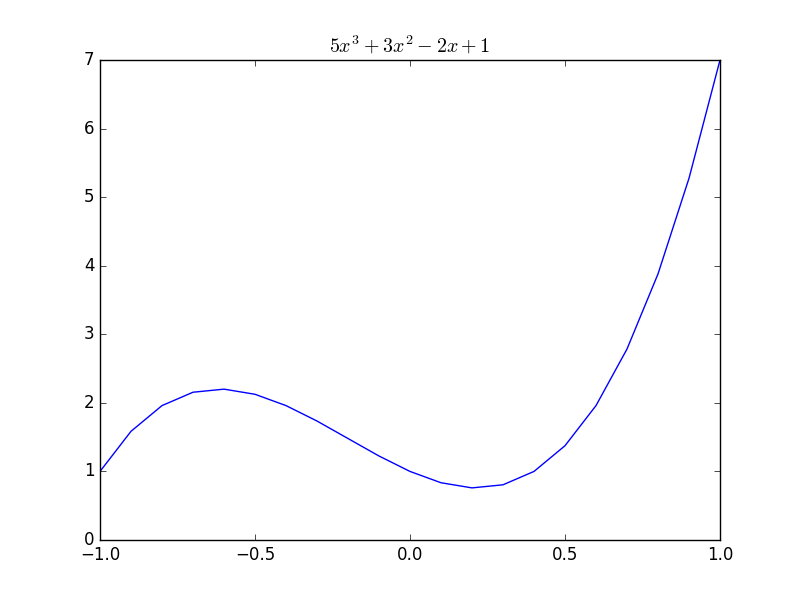

In [50]:
p1-p2+2 # addition and subtraction of polynomials and scalars

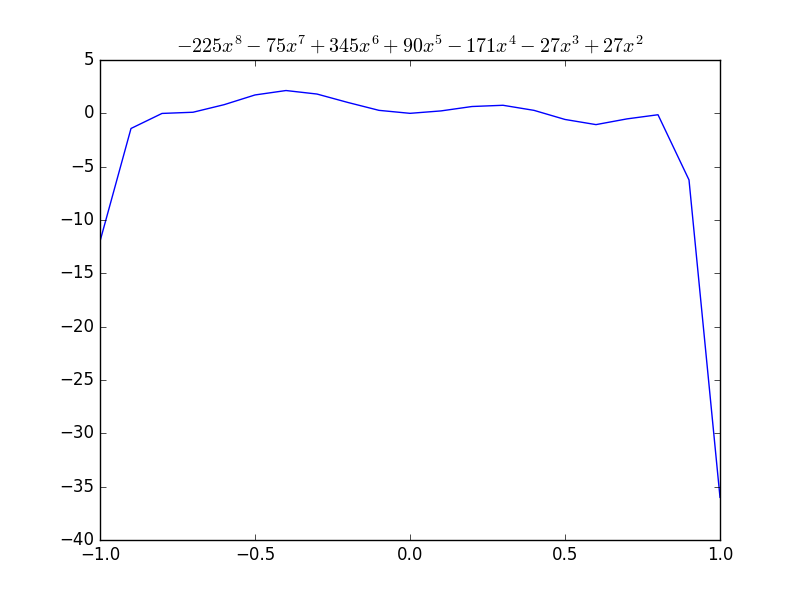

In [51]:
-3*p1*p2**2 # polynomial (and scalar) multiplication and scalar power

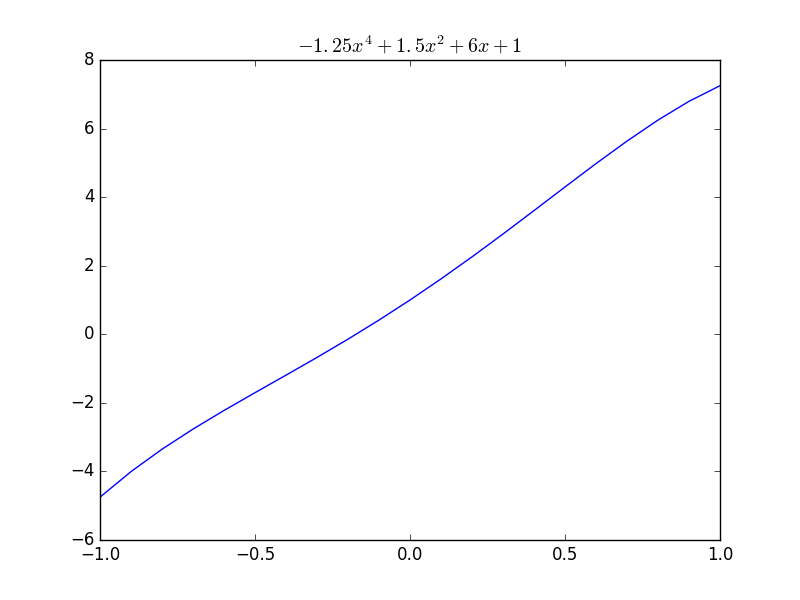

In [52]:
p1.derivative()+p2.integral() #integral and derivative

## Motion
"motion laws" are functions of time which return (position, velocity, acceleration, jerk) tuples

In [53]:
from Goulib.motion import *

### Polynomial Segments

Polynomials are very handy to define Segments as coefficients can easily be determined from start/end conditions.
Also, polynomials can easily be integrated or derivated in order to obtain position, velocity, or acceleration laws from each other.

Motion defines several handy functions that return SegmentPoly matching common situations

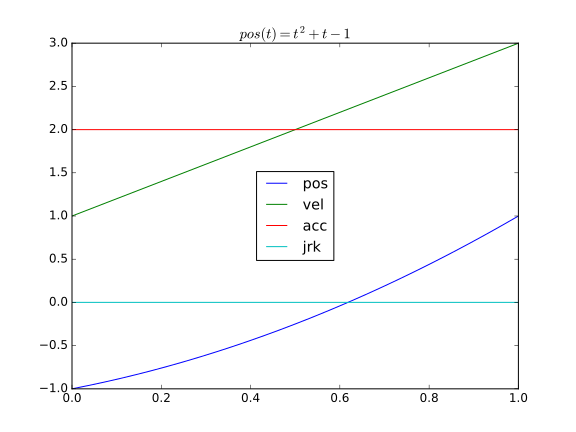

In [54]:
seg=Segment2ndDegree(0,1,(-1,1,2)) # time interval and initial position,velocity and constant acceleration
seg.plot()

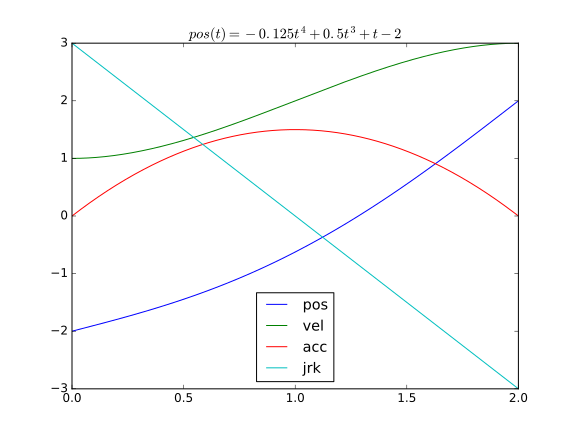

In [55]:
seg=Segment4thDegree(0,None,(-2,1),(2,3)) #start time and initial and final (position,velocity)
seg.plot()

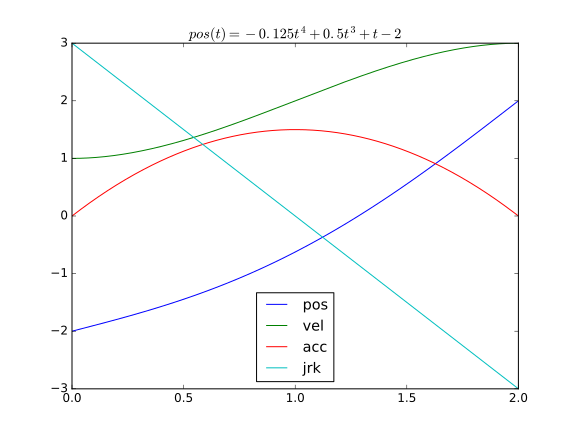

In [56]:
seg=Segment4thDegree(0,2,(-2,1),(None,3)) # start and final time, initial (pos,vel) and final vel
seg.plot()

## Interval
operations on [a..b[ intervals

In [57]:
from Goulib.interval import *

Interval(5,6)+Interval(2,3)+Interval(3,4)

[[2,4), [5,6)]

## Piecewise
Piecewise defined functions

In [58]:
from Goulib.piecewise import *

The simplest are piecewise continuous functions. They are defined by $(x_i,y_i)$ tuples given in any order. 

$f(x) = \begin{cases}y_0 & x < x_1 \\ y_i & x_i \le x < x_{i+1} \\ y_n & x > x_n \end{cases}$

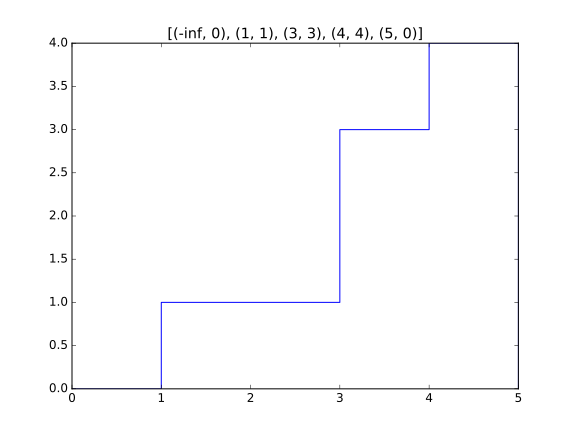

In [59]:
p1=Piecewise([(4,4),(3,3),(1,1),(5,0)])
p1.plot()

By default y0=0 , but it can be specified at construction.

Piecewise functions can also be defined by adding (x0,y,x1) segments

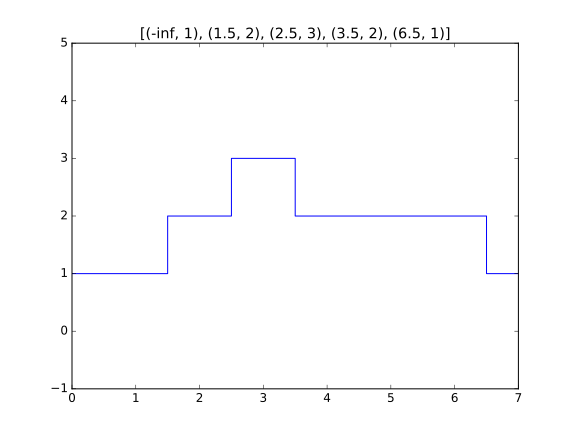

In [60]:
p2=Piecewise(default=1)
p2+=(2.5,1,6.5)
p2+=(1.5,1,3.5)
p2.plot(xmax=7,ylim=(-1,5))

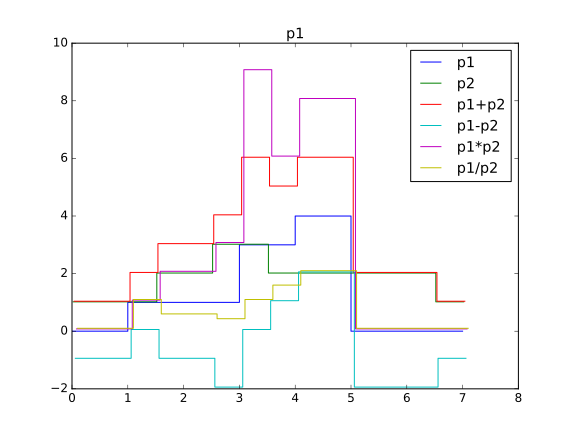

In [61]:
plot.plot([p1,p2,p1+p2,p1-p2,p1*p2,p1/p2],
     labels=['p1','p2','p1+p2','p1-p2','p1*p2','p1/p2'],
     xmax=7, ylim=(-2,10), offset=0.02)

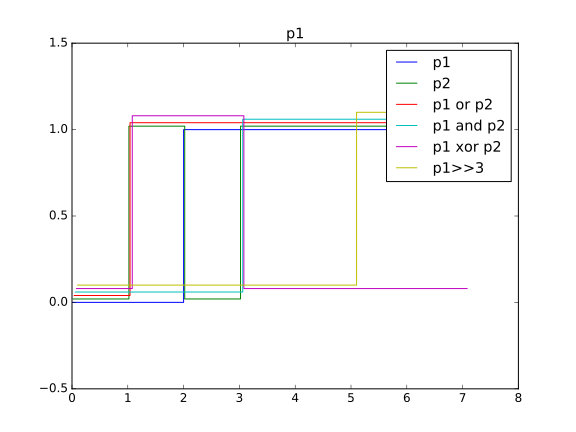

In [62]:
p1=Piecewise([(2,True)],False)
p2=Piecewise([(1,True),(2,False),(3,True)],False)
plot.plot([p1,p2,p1|p2,p1&p2,p1^p2,p1>>3],
     labels=['p1','p2','p1 or p2','p1 and p2','p1 xor p2','p1>>3'],
     xmax=7,ylim=(-.5,1.5), offset=0.02)